In [2]:
from pyscf import gto, scf, mcscf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
for a in np.arange(0.8, 1.01, 0.01 ):
    H3_tri = gto.M(atom=[["H", 0, 0, 0],
                     ["H", 0.87, 0, 0], 
                     ["H", 0.435, b, 0]], basis = 'sto-3g', charge = 0, spin = 1)
    h3uhf=scf.UHF(H3_tri)
    h3uhf.kernel()
    print("Bondlength: ", a, "energy: ", h3uhf.e_tot)

#H2_alpha_coeff=h2uhf.mo_coeff[0]
#H2_beta_coeff=h2uhf.mo_coeff[1]

#length=len(H2_alpha_coeff)
#print(length)

#np.save('../h2_631g_coeffs/uhf_h2_631g_08_alphacoeffs.npy', H2_alpha_coeff)
#np.save('../h2_631g_coeffs/uhf_h2_631g_08_betacoeffs.npy', H2_beta_coeff)


converged SCF energy = -1.58326241074124  <S^2> = 0.77084152  2S+1 = 2.020734
Bondlength:  0.8 energy:  -1.5832624107412383
converged SCF energy = -1.58539146834517  <S^2> = 0.77185839  2S+1 = 2.0217402


Bondlength:  0.81 energy:  -1.5853914683451684
converged SCF energy = -1.58729630994304  <S^2> = 0.77292122  2S+1 = 2.0227914
Bondlength:  0.8200000000000001 energy:  -1.5872963099430428
converged SCF energy = -1.58898896088163  <S^2> = 0.77403212  2S+1 = 2.0238894
Bondlength:  0.8300000000000001 energy:  -1.5889889608816292
converged SCF energy = -1.59048081343853  <S^2> = 0.77519331  2S+1 = 2.0250366
Bondlength:  0.8400000000000001 energy:  -1.5904808134385344
converged SCF energy = -1.59178266573546  <S^2> = 0.77640713  2S+1 = 2.0262351
Bondlength:  0.8500000000000001 energy:  -1.5917826657354566
converged SCF energy = -1.59290475783167  <S^2> = 0.777676  2S+1 = 2.0274871
Bondlength:  0.8600000000000001 energy:  -1.5929047578316728
converged SCF energy = -1.59385680526437  <S^2> = 0.77900249  2S+1 = 2.0287952
Bondlength:  0.8700000000000001 energy:  -1.5938568052643671
converged SCF energy = -1.59464803027177  <S^2> = 0.78038926  2S+1 = 2.0301618
Bondlength:  0.8800000000000001 ener

In [4]:
#H2- minimum at 1.57 Å (sto-3g), 1.55 Å (6-31g)

H2minus = gto.M(atom=[["H", 0, 0, 0],
                     ["H", 4.00, 0, 0]], basis = '6-31g', charge = -1, spin = 1)
H3_lin = gto.M(atom=[["H", 0, 0, 0],
                     ["H", 1.7, 0, 0], 
                     ["H", -1.7, 0, 0]], basis = 'sto-3g', charge = 0, spin = 1)
H3_tri = gto.M(atom=[["H", 0, 0, 0],
                     ["H", 0.87, 0, 0], 
                     ["H", 0.435, 4, 0]], basis = 'sto-3g', charge = 0, spin = 1)


uhfsp=scf.UHF(H3_lin)
uhfsp.kernel()

Alpha_coeff=uhfsp.mo_coeff[0]
Beta_coeff=uhfsp.mo_coeff[1]

print(Alpha_coeff, Beta_coeff)

#np.save('/workspaces/MRA-OrbitalOptimization/coefficients/h3lin_sto3g_coeffs/h3lin_diss/170_alphacoeffs.npy', Alpha_coeff)
#np.save('/workspaces/MRA-OrbitalOptimization/coefficients/h3lin_sto3g_coeffs/h3lin_diss/170_betacoeffs.npy', Beta_coeff)

converged SCF energy = -1.42275515759302  <S^2> = 1.4693546  2S+1 = 2.6224832
[[ 1.47943872e-01  9.99200722e-16  1.02783045e+00]
 [ 6.69171841e-01 -7.09798619e-01 -2.95498658e-01]
 [ 6.69171841e-01  7.09798619e-01 -2.95498658e-01]] [[ 9.50126787e-01 -1.38777878e-15 -4.19024962e-01]
 [ 1.03873801e-01  7.09798619e-01  7.24099885e-01]
 [ 1.03873801e-01 -7.09798619e-01  7.24099885e-01]]


In [20]:
Euhf_H3lin = []
Eucas_H3lin = []
Euhf_631g_H3lin = []
Eucas_631g_H3lin = []
mo = None
for c in np.arange(0.5, 1.95, 0.05 ):
    H3_lin = gto.M(atom=[["H", 0, 0, 0],
                     ["H", c, 0, 0], 
                     ["H", -c, 0, 0]], basis = '6-31g', charge = 0, spin = 1)
    mf = scf.UHF(H3_lin)
    #mf.max_cycle = 70
    #mf.nelec = (2,1)
    Euhf_631g_H3lin.append(mf.kernel())
    
    ncas, nelecas = (6, (2, 1))
    mc = mcscf.UCASSCF(mf, ncas, nelecas)
    if mo is not None:
        mo = mcscf.project_init_guess(mc, mo)
    Eucas_631g_H3lin.append(mc.mc1step(mo)[0])




converged SCF energy = -1.30999235357524  <S^2> = 0.7544615  2S+1 = 2.0044565


UCASSCF energy = -1.335587882721
UCASCI E = -1.335587882721  E(CI) = -3.981473937321  S^2 = 0.7500000
converged SCF energy = -1.40153869070886  <S^2> = 0.75585671  2S+1 = 2.0058482
UCASSCF energy = -1.42802612324962
UCASCI E = -1.42802612324962  E(CI) = -3.83337708197689  S^2 = 0.7500000
converged SCF energy = -1.46704484420729  <S^2> = 0.75765438  2S+1 = 2.0076398
UCASSCF energy = -1.49423563177975
UCASCI E = -1.49423563177975  E(CI) = -3.69914067727975  S^2 = 0.7500000
converged SCF energy = -1.51370024404778  <S^2> = 0.75993568  2S+1 = 2.0099111
UCASSCF energy = -1.5414462836466
UCASCI E = -1.5414462836466  E(CI) = -3.57674324872352  S^2 = 0.7500000
converged SCF energy = -1.54644572323661  <S^2> = 0.76280051  2S+1 = 2.0127598
UCASSCF energy = -1.57463867159568
UCASCI E = -1.57463867159568  E(CI) = -3.46455728202425  S^2 = 0.7500000
converged SCF energy = -1.56878307929246  <S^2> = 0.76637908  2S+1 = 2.0163126
UCASSCF energy = -1.5973524895999
UCASCI E = -1.5973524895999  E(CI) = -3

In [28]:
#trying to get it converged
#dm_init_guess = None
H3_lin_195 = gto.M(atom=[["H", 0, 0, 0],
                     ["H", 1.95, 0, 0], 
                     ["H", -1.95, 0, 0]], basis = '6-31g', charge = 0, spin = 1)
mf17= scf.UHF(H3_lin_195).run()
dm_init_guess= mf17.make_rdm1()

Euhf_part2 = []
Eucas_part2 = []
Euhf_631g_part2 = []
Eucas_631g_part2 = []
mo2 = None
for c in np.arange(1.95, 4.05, 0.05 ):
    H3_lin_2 = gto.M(atom=[["H", 0, 0, 0],
                     ["H", c, 0, 0], 
                     ["H", -c, 0, 0]], basis = '6-31g', charge = 0, spin = 1)
    mf2 = scf.UHF(H3_lin_2)
    #mf2.kernel(dm_init_guess)
    Euhf_631g_part2.append(mf2.kernel(dm_init_guess))
    
    ncas, nelecas = (6, (2, 1))
    mc2 = mcscf.UCASSCF(mf2, ncas, nelecas)
    if mo2 is not None:
        mo2 = mcscf.project_init_guess(mc2, mo2)
    Eucas_631g_part2.append(mc2.mc1step(mo)[0])




converged SCF energy = -1.50498016757879  <S^2> = 1.54344  2S+1 = 2.6783876
converged SCF energy = -1.50498016757938  <S^2> = 1.5434389  2S+1 = 2.6783868


UCASSCF energy = -1.51975863871651
UCASCI E = -1.51975863871651  E(CI) = -2.19819096040882  S^2 = 0.7500000
converged SCF energy = -1.50349866195715  <S^2> = 1.5700001  2S+1 = 2.6981476
UCASSCF energy = -1.51670673104858
UCASCI E = -1.51670673104858  E(CI) = -2.17817824469858  S^2 = 0.7500000
converged SCF energy = -1.50222793397721  <S^2> = 1.5934201  2S+1 = 2.7154521
UCASSCF energy = -1.51397218366185
UCASCI E = -1.51397218366185  E(CI) = -2.15931024575941  S^2 = 0.7500000
converged SCF energy = -1.50113970797404  <S^2> = 1.6139968  2S+1 = 2.7305653
UCASSCF energy = -1.51153424039959
UCASCI E = -1.51153424039959  E(CI) = -2.14150711054245  S^2 = 0.7500000
converged SCF energy = -1.50020901981091  <S^2> = 1.6320229  2S+1 = 2.7437368
UCASSCF energy = -1.50937086207996
UCASCI E = -1.50937086207996  E(CI) = -2.12469320035903  S^2 = 0.7500000
converged SCF energy = -1.49941397041878  <S^2> = 1.6477767  2S+1 = 2.7551963
UCASSCF energy = -1.50745940006688
UCASCI E = -1.50745940006688  E(CI)

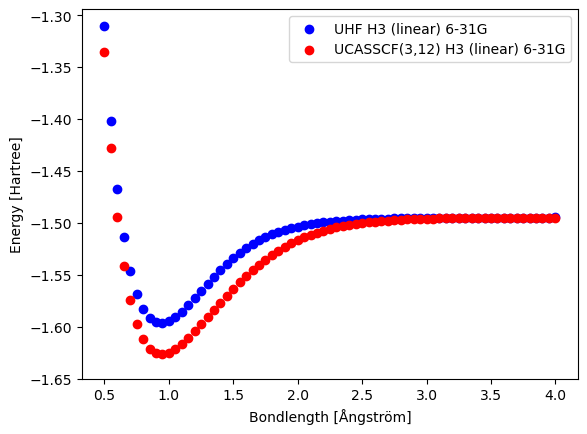

In [29]:
x = np.arange(0.5, 1.95, 0.05)
x2 = np.arange(1.95, 4.05, 0.05)

fig, ax = plt.subplots()
ax.scatter(x, Euhf_631g_H3lin, color='blue', label='UHF H3 (linear) 6-31G')
ax.scatter(x2, Euhf_631g_part2, color='blue')
ax.scatter(x, Eucas_631g_H3lin, color='red', label='UCASSCF(3,12) H3 (linear) 6-31G')
ax.scatter(x2, Eucas_631g_part2, color='red')
ax.legend(loc='upper right')

ax.set_xlabel('Bondlength [Ångström]')
ax.set_ylabel('Energy [Hartree]')
ax.set_xticks(np.arange(0.5, 4.5, 0.5))
ax.set_yticks(np.arange(-1.3, -1.7, -0.05))

plt.show()